In [2]:
!pip install pydotplus

  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24572 sha256=7c18ada897869437519f84e6ad8dd15da45c0cf849cd3e35fd113ad8a20d5f4a
  Stored in directory: c:\users\diksha\appdata\local\pip\cache\wheels\fe\cd\78\a7e873cc049759194f8271f780640cf96b35e5a48bef0e2f36
Successfully built pydotplus


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn import externals
from io import StringIO
import pydotplus
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz

# Business Problem: 1
A cloth manufacturing company is interested to know about the segment or attributes causes high sale

In [4]:
df = pd.read_csv("C:/Users/DIKSHA/Downloads/Company_Data.csv")

In [5]:
df1 = df.copy()

In [6]:
df1.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [7]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,400.0,7.496325,2.824115,0.0,5.39,7.49,9.32,16.27
CompPrice,400.0,124.975000,15.334512,77.0,115.00,125.00,135.00,175.00
Income,400.0,68.657500,27.986037,21.0,42.75,69.00,91.00,120.00
Advertising,400.0,6.635000,6.650364,0.0,0.00,5.00,12.00,29.00
Population,400.0,264.840000,147.376436,10.0,139.00,272.00,398.50,509.00
Price,400.0,115.795000,23.676664,24.0,100.00,117.00,131.00,191.00
Age,400.0,53.322500,16.200297,25.0,39.75,54.50,66.00,80.00
Education,400.0,13.900000,2.620528,10.0,12.00,14.00,16.00,18.00


In [8]:
df1.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [9]:
df1.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [10]:
df1.shape

(400, 11)

# Outlier Check

C:\Users\DIKSHA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


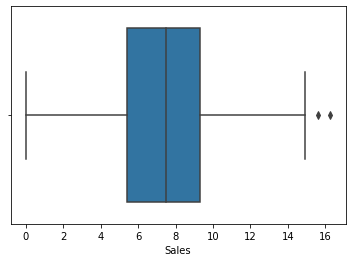

In [11]:
ax = sns.boxplot(df1['Sales'])

The data has 2 outlier instances

In [12]:
plt.rcParams["figure.figsize"] = 9,5

Skew: 0.18556036318721578
Kurtosis: -0.08087736743346197


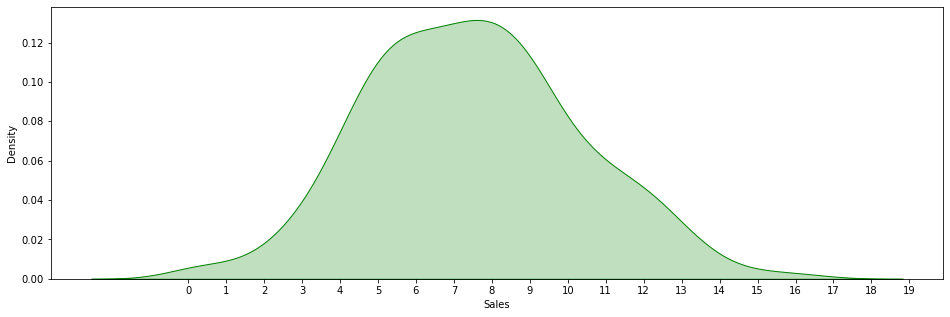

In [13]:
plt.figure(figsize=(16,5))
print("Skew: {}".format(df1['Sales'].skew()))
print("Kurtosis: {}".format(df1['Sales'].kurtosis()))
ax = sns.kdeplot(df1['Sales'],shade=True,color='g')
plt.xticks([i for i in range(0,20,1)])
plt.show()

The data is Skwed on the right

The data has negative Kurtosis

In [14]:
obj_colum = df1.select_dtypes(include='object').columns.tolist()

<ipython-input-15-7759ffd02bd8>:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(2,2,i)
<ipython-input-15-7759ffd02bd8>:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(2,2,i)


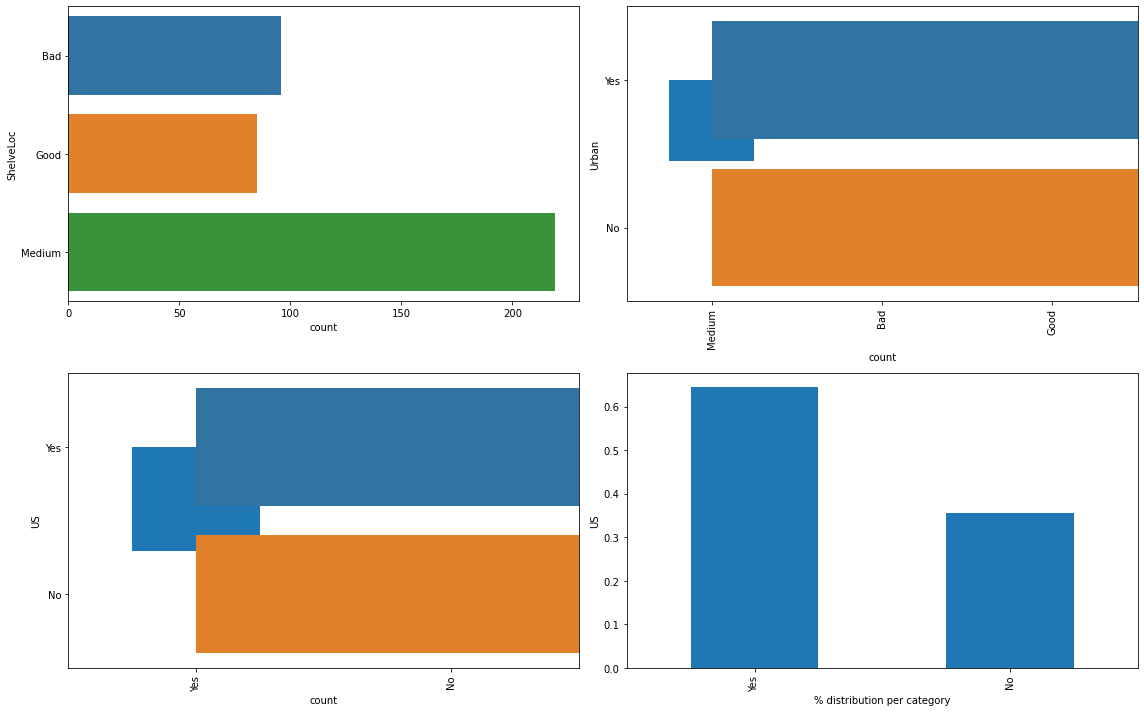

In [15]:
plt.figure(figsize=(16,10))
for i,col in enumerate(obj_colum,1):
    plt.subplot(2,2,i)
    sns.countplot(data=df1,y=col)
    plt.subplot(2,2,i+1)
    df1[col].value_counts(normalize=True).plot.bar()
    plt.ylabel(col)
    plt.xlabel('% distribution per category')
plt.tight_layout()
plt.show()

In [16]:
num_columns = df1.select_dtypes(exclude='object').columns.tolist()

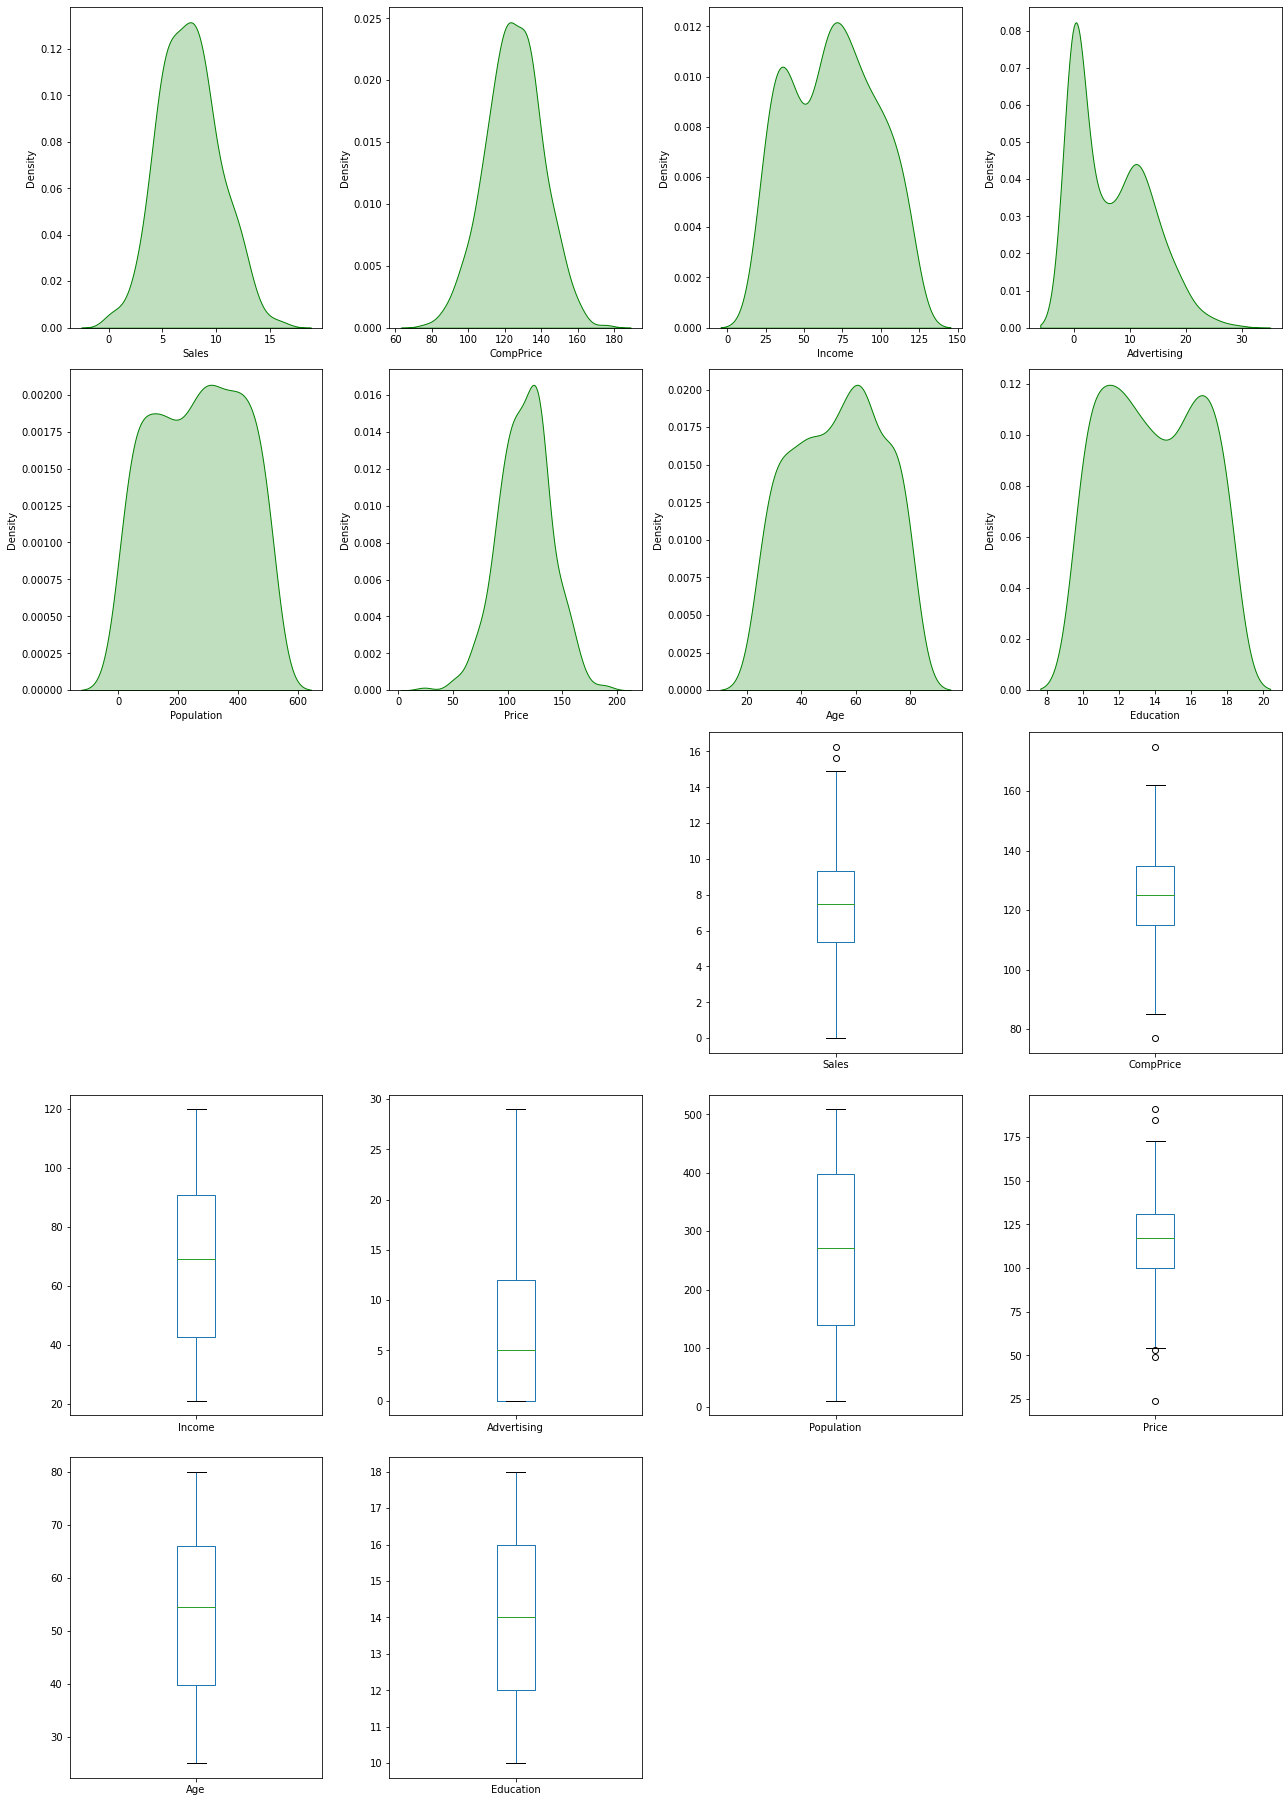

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
skewness,0.185560,-0.042755,0.049444,0.639586,-0.051227,-0.125286,-0.077182,0.044007
kurtosis,-0.080877,0.041666,-1.085289,-0.545118,-1.202318,0.451885,-1.134392,-1.298332


In [17]:
plt.figure(figsize=(18,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(df[col],color='g',shade=True)
    plt.subplot(8,4,i+10)
    df[col].plot.box()
plt.tight_layout() 
plt.show()
num_data = df[num_columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])

In [18]:
corr = df1.corr()

In [19]:
df1 = pd.get_dummies(df1, columns = ['ShelveLoc','Urban','US'])

In [20]:
corr = df1.corr()

<AxesSubplot:>

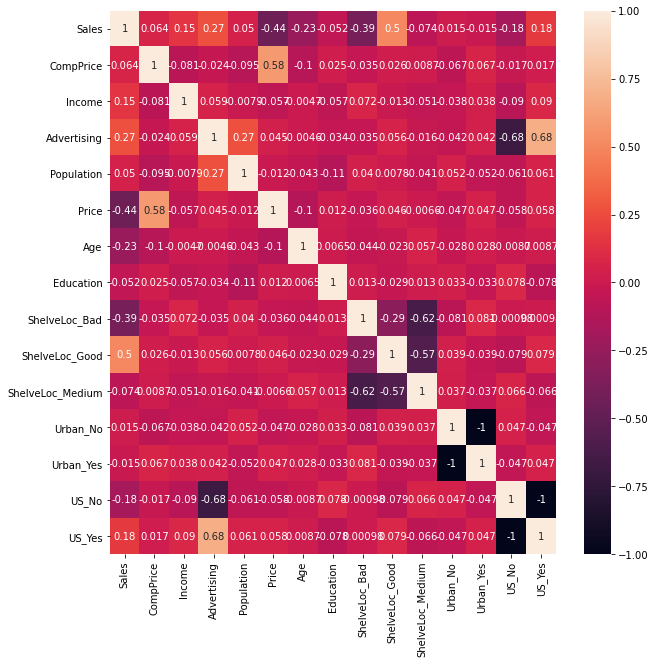

In [21]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

# Decision Tree - Model

Since the target variable is continious, we create a class of the value based on the mean
<= 7.49 == "Small" and > 7.49 == "large"

In [22]:
df1["sales"]="small"
df1.loc[df1["Sales"]>7.49,"sales"]="large"
df1.drop(["Sales"],axis=1,inplace=True)

In [23]:
X = df1.iloc[:,0:14]
y = df1.iloc[:,14]

In [24]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, stratify = y)

In [25]:
y_train.value_counts()

small    161
large    159
Name: sales, dtype: int64

In [26]:
model = DT(criterion='entropy') 
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [27]:
pred_train = model.predict(x_train)

In [28]:
accuracy_score(y_train,pred_train)

1.0

In [29]:
confusion_matrix(y_train,pred_train)

array([[159,   0],
       [  0, 161]], dtype=int64)

In [30]:
pred_test = model.predict(x_test)

In [31]:
accuracy_score(y_test,pred_test)

0.75

In [32]:
confusion_matrix(y_test,pred_test)

array([[29, 11],
       [ 9, 31]], dtype=int64)

In [33]:
df_t=pd.DataFrame({'Actual':y_test, 'Predicted':pred_test})

In [34]:
df_t

,Actual,Predicted
190,large,large
32,small,small
227,large,large
18,large,large
201,small,small
...,...,...
94,large,small
215,small,small
61,small,small
35,large,large


In [35]:
cols = list(df1.columns)

In [36]:
predictors = cols[0:14]
target = cols[14]

In [37]:
dot_data = StringIO()

In [38]:
export_graphviz(model,out_file = dot_data, filled =True, rounded = True, feature_names =predictors,class_names = target, impurity = False )

In [39]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

# Conclusion

Since the accuracy of the Training set is 100% we test the accurancy on the test data which is 70%

As seen in the confusion matrix of Test data 56 instances are presdected correctly and 24 instances are not

In [12]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg 

In [13]:
img = mpimg.imread('C:/Users/DIKSHA/Downloads/company_full.png')

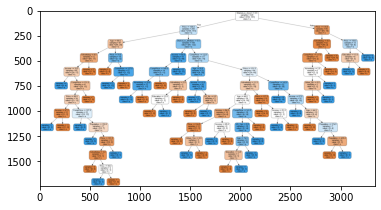

In [14]:
plt.imshow(img)

# As seen in the above picture Price is most important feature

# Business Problem- 2

Use decision trees to prepare a model on fraud data treating those who have taxableincome <= 30000 as "Risky" and others are "Good"

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn import externals
from io import StringIO
import pydotplus
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz

In [19]:
df = pd.read_csv("C:/Users/DIKSHA/Downloads/Fraud_check.csv")

In [20]:
df1 = df.copy()

In [21]:
df1.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [22]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Taxable.Income,600.0,55208.375000,26204.827597,10003.0,32871.50,55074.5,78611.75,99619.0
City.Population,600.0,108747.368333,49850.075134,25779.0,66966.75,106493.5,150114.25,199778.0
Work.Experience,600.0,15.558333,8.842147,0.0,8.00,15.0,24.00,30.0


In [23]:
df1.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [24]:
df1.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

# Outlier Check

C:\Users\DIKSHA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


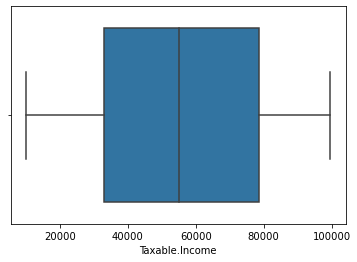

In [25]:
ax = sns.boxplot(df1['Taxable.Income'])

There are no outliers in the data

In [26]:
plt.rcParams["figure.figsize"] = 9,5

Skew: 0.030014788906377175
Kurtosis: -1.1997824607083138


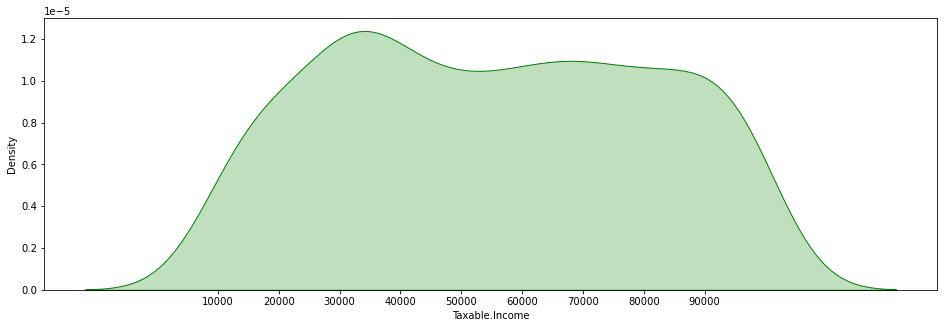

In [27]:
plt.figure(figsize=(16,5))
print("Skew: {}".format(df1['Taxable.Income'].skew()))
print("Kurtosis: {}".format(df1['Taxable.Income'].kurtosis()))
ax = sns.kdeplot(df1['Taxable.Income'],shade=True,color='g')
plt.xticks([i for i in range(10000,100000,10000)])
plt.show()

The data is Skwed on the right
The data has negative Kurtosis

In [28]:
obj_colum = df1.select_dtypes(include='object').columns.tolist()

<ipython-input-29-7759ffd02bd8>:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(2,2,i)
<ipython-input-29-7759ffd02bd8>:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(2,2,i)


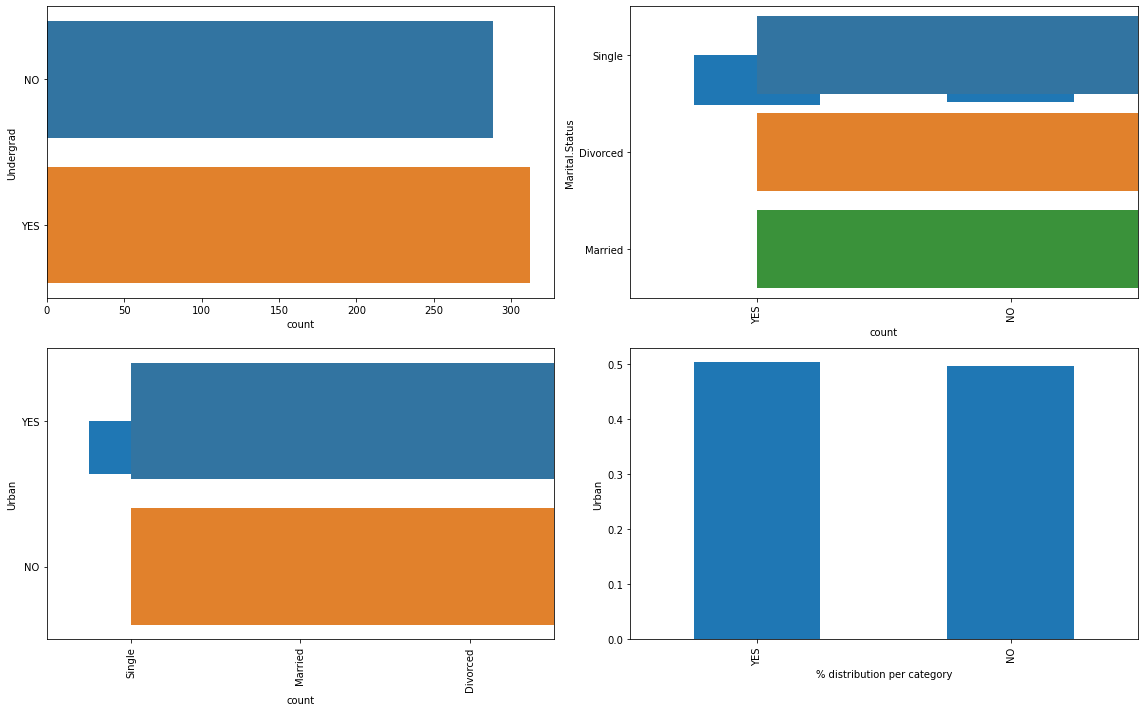

In [29]:
plt.figure(figsize=(16,10))
for i,col in enumerate(obj_colum,1):
    plt.subplot(2,2,i)
    sns.countplot(data=df1,y=col)
    plt.subplot(2,2,i+1)
    df1[col].value_counts(normalize=True).plot.bar()
    plt.ylabel(col)
    plt.xlabel('% distribution per category')
plt.tight_layout()
plt.show()

In [30]:
num_columns = df1.select_dtypes(exclude='object').columns.tolist()

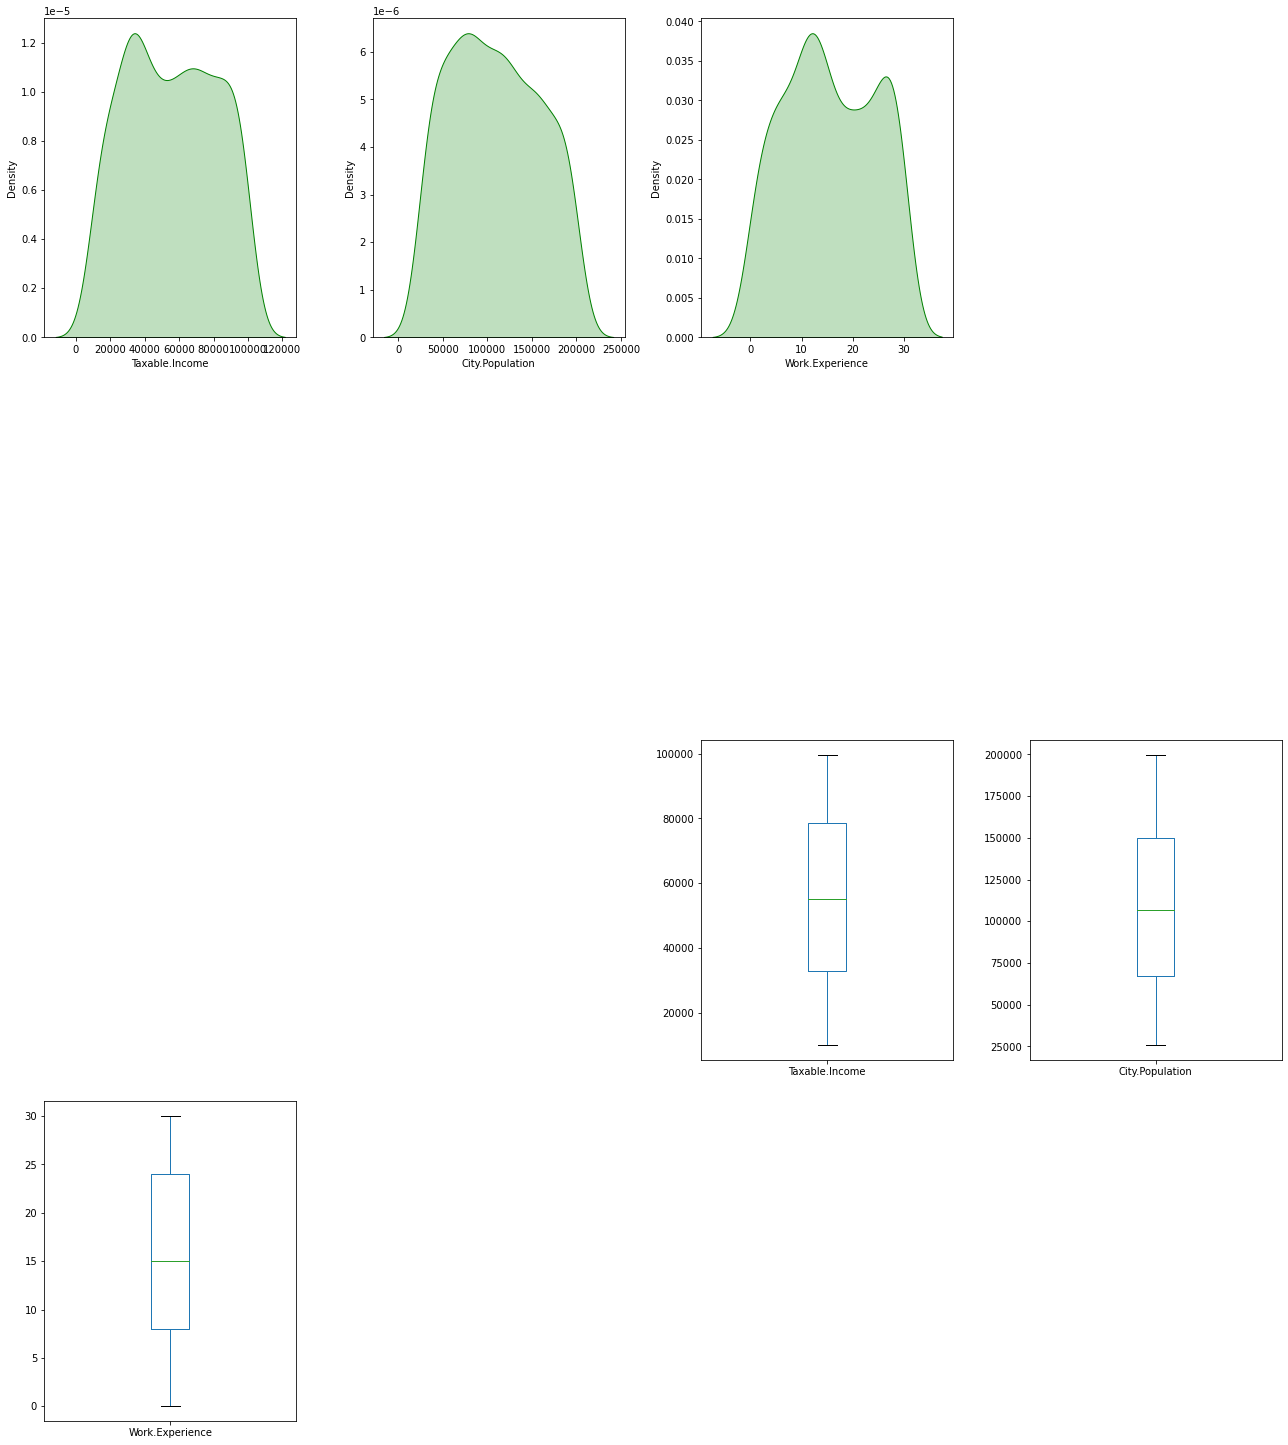

,Taxable.Income,City.Population,Work.Experience
skewness,0.030015,0.125009,0.018529
kurtosis,-1.199782,-1.120154,-1.167524


In [31]:
plt.figure(figsize=(18,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(df[col],color='g',shade=True)
    plt.subplot(8,4,i+10)
    df[col].plot.box()
plt.tight_layout() 
plt.show()
num_data = df[num_columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])

In [32]:
df1 = pd.get_dummies(df1, columns = ['Undergrad','Marital.Status','Urban'])

In [33]:
corr = df1.corr()

In [34]:
corr = df1.corr()

<AxesSubplot:>

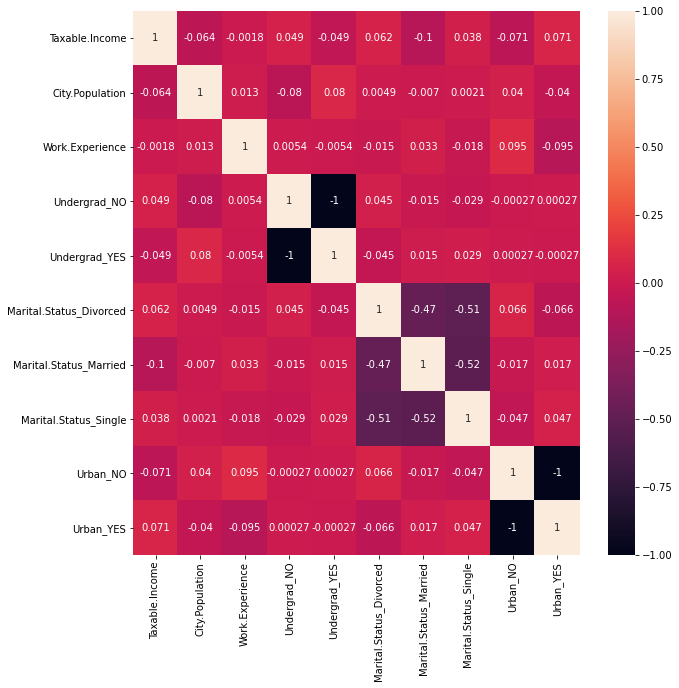

In [35]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

# Decision Tree
Since the target variable is continious, we create a class of taxable_income <= 30000 as "Risky" and others are "Good"

In [36]:
df1['Taxable.Income']=pd.cut(df1['Taxable.Income'],bins=[0,30000,100000],labels=['risky','good'])

In [37]:
list(df1.columns)

['Taxable.Income',
 'City.Population',
 'Work.Experience',
 'Undergrad_NO',
 'Undergrad_YES',
 'Marital.Status_Divorced',
 'Marital.Status_Married',
 'Marital.Status_Single',
 'Urban_NO',
 'Urban_YES']

In [38]:
X = df1.iloc[:,1:10]
y = df1.iloc[:,0]

In [39]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [40]:
y_train.value_counts()

good     377
risky    103
Name: Taxable.Income, dtype: int64

In [41]:
model = DT(criterion='entropy') 
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [42]:
pred_train = model.predict(x_train)

In [43]:
accuracy_score(y_train,pred_train)

1.0

In [44]:
confusion_matrix(y_train,pred_train)

array([[377,   0],
       [  0, 103]], dtype=int64)

In [45]:
pred_test = model.predict(x_test)

In [46]:
accuracy_score(y_test,pred_test)

0.6333333333333333

In [47]:
confusion_matrix(y_test,pred_test)

array([[71, 28],
       [16,  5]], dtype=int64)

In [48]:
df_t=pd.DataFrame({'Actual':y_test, 'Predicted':pred_test})

In [49]:
df_t

,Actual,Predicted
539,good,risky
298,good,good
123,risky,good
257,good,good
582,good,risky
...,...,...
473,good,good
408,good,good
588,good,risky
510,good,good


In [50]:
cols = list(df1.columns)

In [51]:
predictors = cols[1:10]
target = cols[0]

In [52]:
dot_data = StringIO()

In [53]:
export_graphviz(model, out_file = dot_data ,filled = True,rounded =True,feature_names = predictors,class_names = target, impurity = False)

In [54]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

# Conclusion

Since the accuracy of the Training set is 100% we test the accurancy on the test data which is 69%¶

As seen in the confusion matrix of Test data 82 instances are presdected correctly and 38 instances are not

In [56]:
img = mpimg.imread('C:/Users/DIKSHA/Downloads/fraud_full.png')

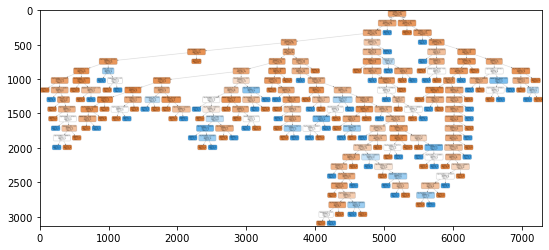

In [57]:
plt.imshow(img)

In [58]:
model.feature_importances_

array([0.46250732, 0.31460752, 0.02821061, 0.03437725, 0.05159027,
       0.01621717, 0.02595299, 0.02692089, 0.03961599])

In [59]:
fi = pd.DataFrame({'feature': list(x_train.columns),
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)

In [60]:
fi

,feature,importance
0,City.Population,0.462507
1,Work.Experience,0.314608
4,Marital.Status_Divorced,0.051590
8,Urban_YES,0.039616
3,Undergrad_YES,0.034377
2,Undergrad_NO,0.028211
7,Urban_NO,0.026921
6,Marital.Status_Single,0.025953
5,Marital.Status_Married,0.016217
